[View in Colaboratory](https://colab.research.google.com/github/jrstevenjlab/ColaboratoryAtomicLab/blob/master/Blackbody_PowerVsTemperature.ipynb)

The goal of the excercise is to fit the function 

$$S_{model}(T) = B + C \cdot T^{n}$$

to data for power as a function of temperature that you recorded in lab.  The parameters of the function are:

*   B: a background term, the value the data would have at T=0,
*   C: a scale factor which multiplies $T^n$, which translates the units
 from $temperature^n$ to radiated power.
*   n: the power in the power law, which we expect to be 4

By "fitting" the data we mean that the parameters of the model are allowed to vary until the curve defined by this function best match the data you've measured.  This is done by minimizing the $\chi^2$ which is a metric for comparing the model function to the observed data.  The $\chi^2$ is defined as

$$\chi^{2} = \sum_{i=0} \frac{S_i - S_{model}(T_i)}{\sigma_{S_{i}}}$$

where the sum of $i$ is over your observed data points
*  $S_i$ are the individual data points for the power (y-axis value), 
*  $\sigma_{S_{i}}$ are the errors on the individual data points,
*  and $S_{model}(T_i)$ is the value of your model function at the temperature $T_i$

The steps below describe the process that you should follow:

1.   Enter your data for power and position in the ordered lists below, replacing the example data already there.
2.   Run the fit code by pressing the "Play" button, which will cause a few things to happen:
> * Your data will be plotted as blue points in the figure below the code 
> * The `curve_fit` command in the code will find the "best fit" values for the paremeters of the model which gives the smallest value for the $\chi^2$ possible (ie. it "minimizes" the $\chi^2$).
> * The function S(T) with these "best fit" parameters will be plotted in red overlayed with your data points
> * The values for the parameters are output as text below the figure, along with the uncertainties on those parameters.

Finally, we need evaluate the "quality" of our fit by looking at the $\chi^{2}/DOF$, where DOF is the **Degrees Of Freedom** of the fit, defined as:

$$DOF = # data points - # parameters$$

In our case the # parameters = 3 (B, C, and n). and the # data points is given by the number of points you observed in lab.   In general, a "good" fit will have a $\chi^{2}/DOF$ close to 1.  
*  If $\chi^{2}/DOF$ >> 1, then the errors were likely **underestimated** meaning the model function does not describe the data.
*  If $\chi^{2}/DOF$ << 1, then the errors were likely **overestimated** meaning the model describes the data better than it should (statistically).

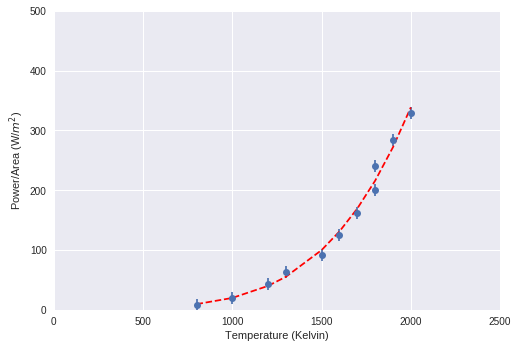

Model parameters:
B   = 3.085083977158851  +/-  8.601309578175412
C   = 1.7761309350102142e-12  +/-  4.641151634060713e-12
n   = 4.324744952007914  +/-  0.3430821059096133

Fit quality:
chisq = 13.350833918407737 dof = 8


In [1]:
# import modules needed for data analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# function for power vs distance with paramters B, C, and n
def Smodel(x, B, C, n):
  return B + C * np.power(T, n)

##########################
# INSERT YOUR DATA HERE! #
##########################

# enter as a list here for radiation (S) and temperature (T)
# T = temperature (Kelvin)
T = [800,1000,1200,1300,1500,1600,1700,1800,1800,1900,2000]

# S = converted sensor reading (W/m^2)
S = [7.95,19.32,43.18,62.50,92.05,125.0,161.36,200.0,240.91,284.09,329.55]

# uncertainy (error) on converted sensor reading: YOU NEED TO DETERMINE THIS!!! 
Serr_value = 10.0 # fixed uncertainty on power for all datapoints in W/m^2
Serr = np.repeat(Serr_value, len(S)) 

# plot the data on a new figure
plt.figure() # create new figure for plotting
plt.errorbar(T, S, Serr, fmt='o') # plot S vs T, where Serr is the uncertainty on your power values
plt.axis([0, 2500, 0, 500])  # set axes [Tmin, Tmax, Smin, Smax]
plt.xlabel('Temperature (Kelvin)') # set x-axis label
plt.ylabel('Power/Area (W/$m^2$)') # set y-axis label 

# fit the data
initialParameters = [0,1e-12,4] # start with initial guess for fit parameters [B, C, n]
finalParameters, finalParameterErrors = curve_fit(Smodel, T, S, initialParameters, Serr, True) #

# show red curve for fit results and plot on top of the data
plt.plot(T, Smodel(T, *finalParameters), 'r--', label='fit: B=%5.3f, C=%5.3f, n=%5.3f' % tuple(finalParameters))
plt.show()

# output fit parameter values and errors
print("Model parameters:")
print("B   =", finalParameters[0], " +/- ",np.sqrt(finalParameterErrors[0,0]))
print("C   =", finalParameters[1], " +/- ",np.sqrt(finalParameterErrors[1,1]))
print("n   =", finalParameters[2], " +/- ",np.sqrt(finalParameterErrors[2,2]))

# compare model function with obtained parameters to data to determine fit quality
Smodel_i = Smodel(T, *finalParameters)
deltaS = S - Smodel_i # calculate difference between data and model
chisq = np.sum((deltaS/Serr)**2) # calculate chi^2 by summing over difference for all data points
dof = len(S) - len(finalParameters) # Degrees of Freedom = # data points - # parameters
print("\nFit quality:")
print("chisq =",chisq,"dof =",dof)
